# 01. Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import and check data

In [2]:
# Define path
path = r'/Users/elisabetta/Documents/12-2022 Instacart Basket Analysis'

In [3]:
# Import pickle file
df_ords_prods_merged_3 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_3.pkl'))

In [4]:
# Check import
df_ords_prods_merged_3.shape

(32404854, 23)

In [5]:
df_ords_prods_merged_3.head()

,order_id,user_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range,busy_day,busy_day_2,busiest_period_of_day,max_number_of_orders,loyalty_flag,avg_spend,spend_flag,median_d_s_p_o,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Medium,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Medium,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Medium,Regularly busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Medium,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Medium,Least busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


# 03. Bar charts

<AxesSubplot:>

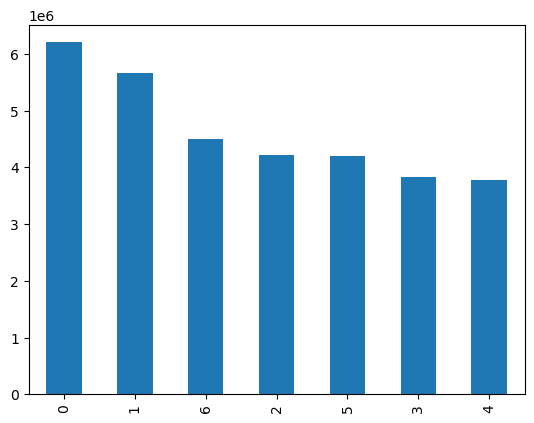

In [6]:
# Create bar chart for order_day_of_week
df_ords_prods_merged_3['order_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

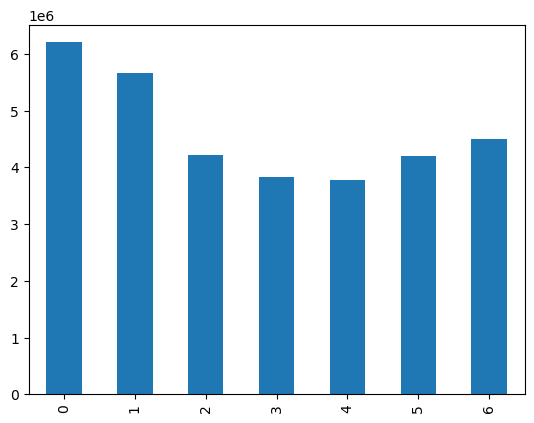

In [7]:
# Sort bars according to number of day ascending
df_ords_prods_merged_3['order_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

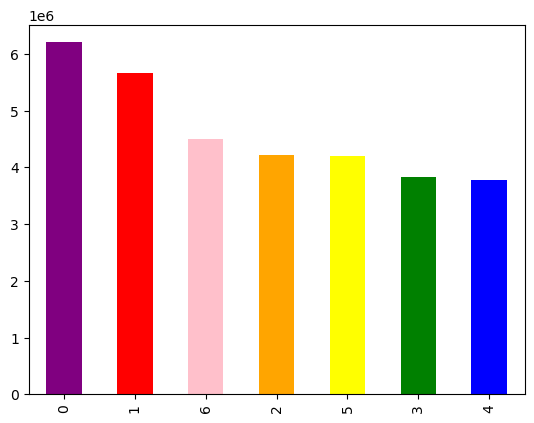

In [8]:
# Assign colors to bars
df_ords_prods_merged_3['order_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

Text(0, 0.5, 'number of orders')

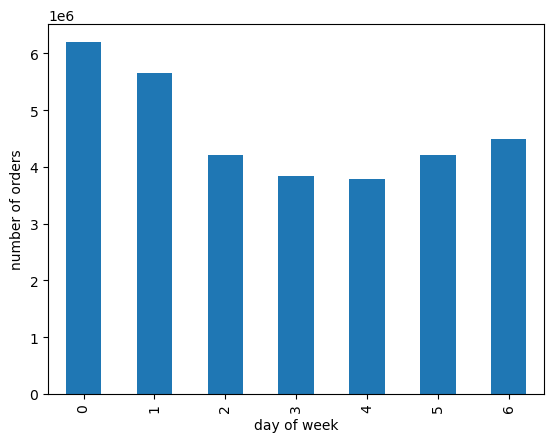

In [17]:
# Save the chosen version of the chart as a specific object, here called 'bar', with all the details wanted
bar = df_ords_prods_merged_3['order_day_of_week'].value_counts().sort_index().plot.bar()
plt.xlabel('day of week')
plt.ylabel('number of orders')

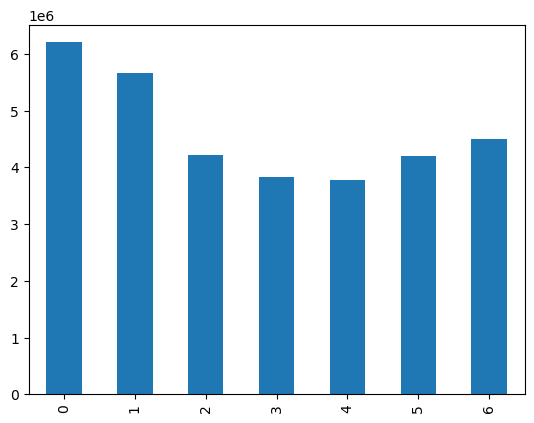

In [10]:
# Call the object 'bar' to check output
bar.figure

In [18]:
# Export chart as image
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dows_exercise_4.9.png'))

# 04. Histograms and scatterplots

<AxesSubplot:ylabel='Frequency'>

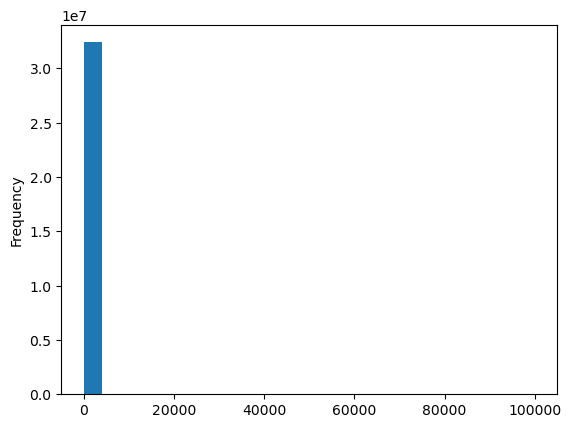

In [12]:
# Create histogram of column 'price'
# Why are all values in one bucket?
df_ords_prods_merged_3['price'].plot.hist(bins = 25)

In [13]:
# Run checks. Max looks suspiciously high
df_ords_prods_merged_3['price'].describe()

count    3.240485e+07
mean     1.198023e+01
std      4.956555e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='price'>

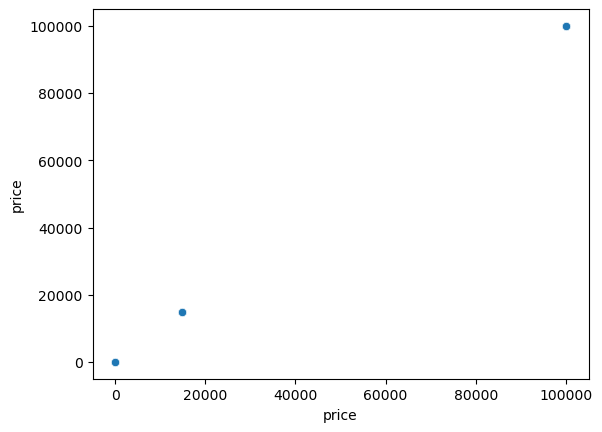

In [14]:
# Create scatterplot
# See some extreme outliers
sns.scatterplot(x = 'price', y = 'price', data = df_ords_prods_merged_3)

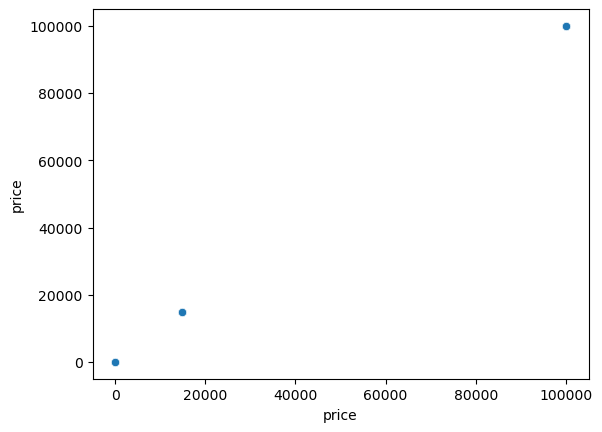

In [15]:
# Save scattrelplot as object
scatter = sns.scatterplot(x = 'price', y = 'price', data = df_ords_prods_merged_3)

In [16]:
# Export scatterplot as image
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_price_exercise_4.9.png'))

In [ ]:
# THE DATAFRAME HAS TOO MANY USELESS COLUMNS
# Drop useless columns
df_ords_prods_merged_3 = df_ords_prods_merged_3.drop(columns = ['busy_day_2', 'max_number_of_orders', 'avg_spend', 'median_d_s_p_o'])

In [ ]:
# Check output
df_ords_prods_merged_3.head()

In [ ]:
df_ords_prods_merged_3.shape

In [ ]:
# CONTINUE EXERCISE AFTER DROPPING USELESS COLUMNS
# Check data. Look for prices higher than 100 USD
df_ords_prods_merged_3.loc[df_ords_prods_merged_3['price'] > 100]

In [ ]:
# Such high prices make no sense. It must be a mistake of some sort
# We therefore turn them into NaNs
df_ords_prods_merged_3.loc[df_ords_prods_merged_3['price'] >100, 'price'] = np.nan

In [ ]:
# Check output
df_ords_prods_merged_3['price'].describe()

In [ ]:
df_ords_prods_merged_3['price'].max()

In [ ]:
# Try again create a histogram
df_ords_prods_merged_3['price'].plot.hist(bins = 25)

In [ ]:
# Increase granularity
df_ords_prods_merged_3['price'].plot.hist(bins = 70)

In [ ]:
# Save histogram as specific object
hist = df_ords_prods_merged_3['price'].plot.hist(bins = 70)

In [ ]:
# Export chart as image
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices_exercise_4.9.png'))

# 05. Sample data

In [ ]:
# Create randomized sample 70/30
# First create list flagging rows True/False in dev column
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merged_3)) <= 0.7

In [ ]:
# Check output
dev

In [ ]:
# Store 70% of list in sample_large
sample_large = df_ords_prods_merged_3[dev]

In [ ]:
#Store 30& in sample_small
sample_small = df_ords_prods_merged_3[~dev]

In [ ]:
# Check output
len(df_ords_prods_merged_3)

In [ ]:
len(sample_large)

In [ ]:
len(sample_small)

In [ ]:
len(sample_large) + len(sample_small)

In [ ]:
# Further reduce dataframe to only columns I need to create chart
df_small_day_price = sample_small[['order_day_of_week', 'price']]

In [ ]:
# Check output
df_small_day_price.shape

In [ ]:
df_small_day_price.head()

In [ ]:
# Create line chart
line = sns.lineplot(data = df_small_day_price, x = 'order_day_of_week', y = 'price')

In [ ]:
# Export chart as image
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_day_price_exercise_4.9.png'))